In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch
import matplotlib.patches as patches
from collections import Counter
import matplotlib.patheffects as path_effects

import matplotlib.cm as cm
import matplotlib.colors as mcolors

from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
import urllib
from urllib.request import urlopen

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("D:\FData\EPL_2023-24\EPL_2023\EPL_2023_2024GW01_to_GW38.csv")

In [44]:
df = pd.read_csv("D:\FData\LaLiga_2023-24\GW1_to_GW_38combinded.csv")

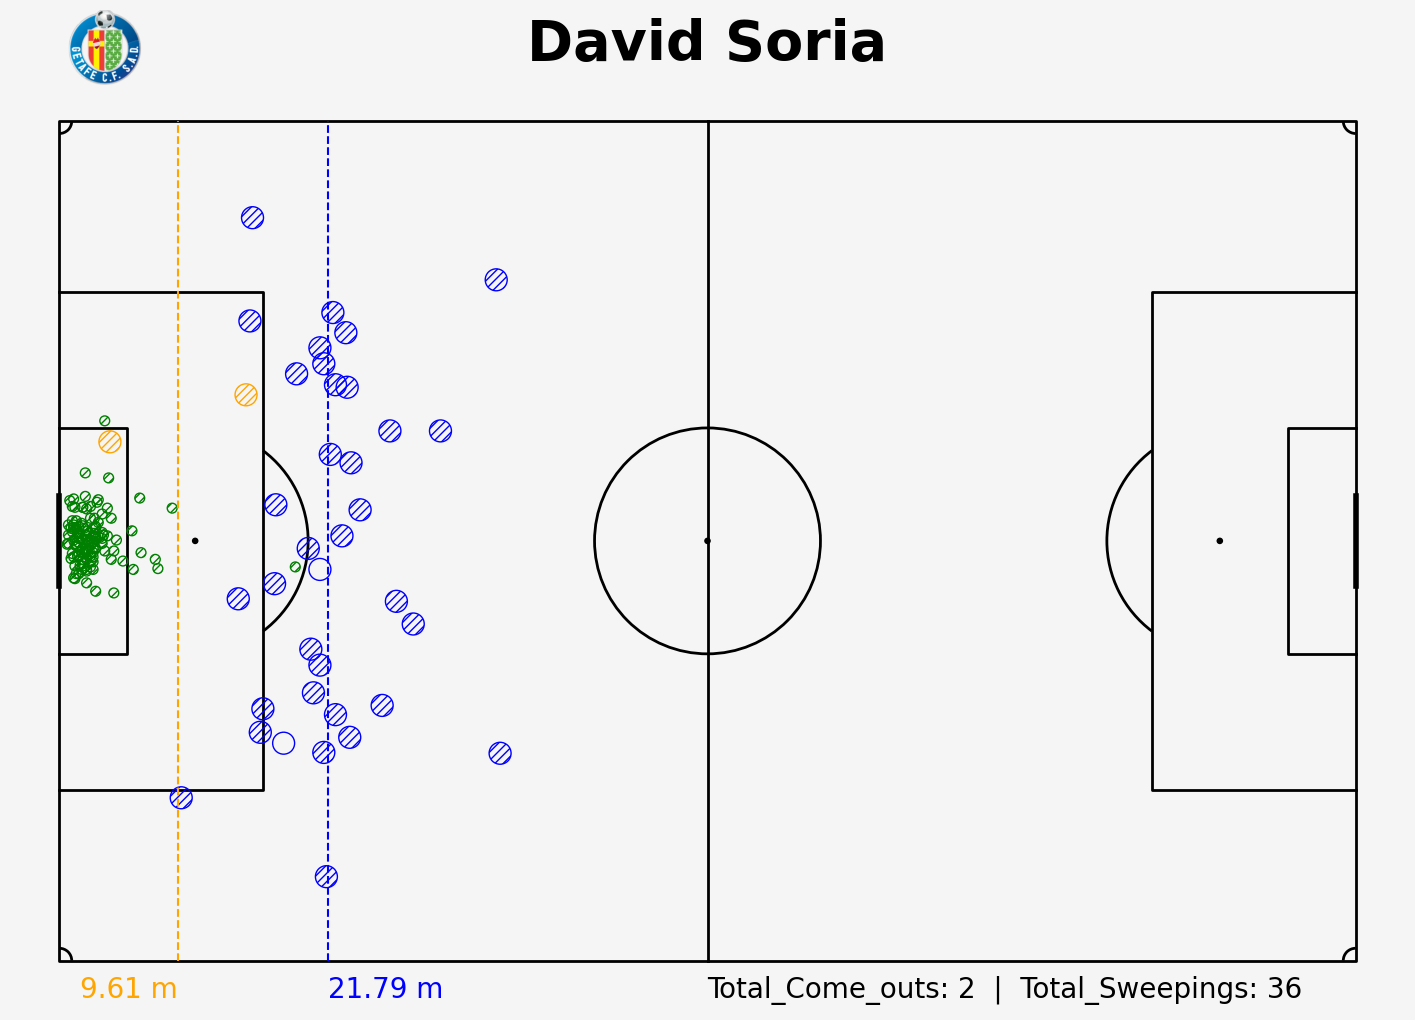

In [56]:
def gk_dashboard(ax, pname):
    pitch = Pitch(pitch_type='uefa', pitch_color='#f5f5f5', line_color='k', corner_arcs=True, linewidth=2)
    pitch.draw(ax=ax)

    dfp = df[df['name']==pname]
    ks_s = dfp[(dfp['type']=='KeeperSweeper') & (dfp['outcomeType']=='Successful')]
    ks_u = dfp[(dfp['type']=='KeeperSweeper') & (dfp['outcomeType']=='Unsuccessful')]
    sm = dfp[dfp['type']=='Smother']
    sv = dfp[dfp['type']=='Save']

    ks_m = round(ks_s['x'].median(),2)
    sm_m = round(sm['x'].median(),2)

    ax.scatter(ks_s.x, ks_s.y, s=250, color='None', edgecolor='b', hatch='////')
    ax.scatter(ks_u.x, ks_u.y, s=250, color='None', edgecolor='b')
    ax.scatter(sm.x, sm.y, s=250, color='None', edgecolor='orange', hatch='////')
    ax.scatter(sv.x, sv.y, s=50, color='None', edgecolor='green', hatch='////')

    ax.vlines(ks_m, ymin=0, ymax=68, color='b', ls='--')
    ax.vlines(sm_m, ymin=0, ymax=68, color='orange', ls='--')

    ax.text(ks_m, -3, f'{ks_m} m', fontsize=20, color='b')
    ax.text(sm_m, -3, f'{sm_m} m', fontsize=20, color='orange', ha='right')
    ax.text(52.5, -3, f'Total_Come_outs: {len(sm)}  |  Total_Sweepings: {len(ks_s)+len(ks_u)}', fontsize=20)

    ax.set_title(f'{pname}', fontsize=40, fontweight='bold')
    team_name = dfp['teamName'].unique()
    team_name = team_name[0]
    # Take data coordinates and transform them to normalized figure coordinates
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    
    ax_coords = DC_to_NFC((0,64))
    ax_size = 0.05
    image_ax = fig.add_axes([ax_coords[0], ax_coords[1], ax_size, ax_size], fc='None', anchor='C')
    fotmob_url = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    fotmob_url = fotmob_url.replace(' ', '%20')
    club_icon = Image.open(urllib.request.urlopen(fotmob_url))
    image_ax.imshow(club_icon)
    image_ax.axis('off')

    return

fig,ax=plt.subplots(figsize=(18,15),facecolor='#f5f5f5')
gk_dashboard(ax, 'David Soria')

In [45]:
df[df['position']=='GK']['name'].unique()

array(['Luís Maximiano', 'Unai Simón', 'Paulo Gazzaniga',
       'Predrag Rajkovic', 'Rui Silva', 'Marc-André ter Stegen',
       'Diego Mariño', 'Stole Dimitrievski', 'Antonio Sivera',
       'Álvaro Vallés', 'Fernando Martínez', 'Filip Jørgensen',
       'David Soria', 'Andriy Lunin', 'Álex Remiro', 'Jan Oblak',
       'Ørjan Nyland', 'Giorgi Mamardashvili', 'Iván Villar',
       'André Ferreira', 'David Gil', 'Sergio Herrera', 'Augusto Batalla',
       'Julen Agirrezabala', 'Unai Marrero', 'Conan Ledesma',
       'Vicente Guaita', 'Marko Dmitrovic', 'Kepa', 'Iñaki Peña',
       'Aitor Fernández', 'Jesús Owono', 'Claudio Bravo', 'Iván Cuéllar',
       'Marc Martínez', 'Thibaut Courtois', 'Raúl Fernández',
       'Aarón Escandell', 'Pepe Reina', 'Dani Cárdenas', 'Fran Vieites',
       'Yassine Bounou', 'Dominik Greif', 'Jaume Domènech',
       'Andrii Lunin'], dtype=object)

In [46]:
def gk_dashboard(pname):
    dfp = df[df['name']==pname]
    ks_s = dfp[(dfp['type']=='KeeperSweeper') & (dfp['outcomeType']=='Successful')]
    ks_u = dfp[(dfp['type']=='KeeperSweeper') & (dfp['outcomeType']=='Unsuccessful')]
    sm = dfp[dfp['type']=='Smother']

    ks_m = round(ks_s['x'].median(),2)
    sm_m = round(sm['x'].median(),2)
    ks_max = round(ks_s['x'].max(),2)
    sm_max = round(sm['x'].max(),2)

    return {
        'Name': pname,
        'Total_Come_outs': len(sm),
        'Total_Sweepings': len(ks_s)+len(ks_u),
        'Avg_Come_out_Distance': sm_m,
        'Avg_Sweeping_Distance': ks_m,
        'Max_Come_out_Distance': ks_max,
        'Max_Sweeping_Distance': sm_max
    }

pnames = df[df['position']=='GK']['name'].unique()

list = []
for pname in pnames:
    stats = gk_dashboard(pname)
    list.append(stats)

gk_stats = pd.DataFrame(list)
gk_stats = gk_stats.sort_values(by='Total_Sweepings', ascending=False).reset_index(drop=True)
gk_stats

Name  Total_Come_outs  Total_Sweepings  \
0           Álvaro Vallés                2               38   
1             David Soria                2               36   
2          Luís Maximiano                7               23   
3      Stole Dimitrievski                0               20   
4             Álex Remiro                2               20   
5           Conan Ledesma                0               19   
6          Sergio Herrera                3               17   
7    Giorgi Mamardashvili                3               16   
8               Rui Silva                4               15   
9          Antonio Sivera                2               14   
10             Unai Simón                6               14   
11         Vicente Guaita                2               13   
12       Predrag Rajkovic                1               12   
13        Paulo Gazzaniga                2               11   
14        Filip Jørgensen                3               10   
15           Andriy Lunin                2                9   
16        Augusto Batalla                4                8   
17              Jan Oblak                1                8   
18        Marko Dmitrovic                0                7   
19           Ørjan Nyland                0                5   
20         André Ferreira                4                5   
21      Fernando Martínez                1                5   
22        Aitor Fernández                1                5   
23         Raúl Fernández                1                4   
24          Marc Martínez                0                3   
25  Marc-André ter Stegen                3                3   
26                   Kepa                1                2   
27       Thibaut Courtois                0                2   
28            Jesús Owono                1                2   
29           Unai Marrero                0                2   
30     Julen Agirrezabala                1                2   
31           Diego Mariño                0                1   
32            Iván Villar                6                1   
33          Claudio Bravo                1                1   
34              David Gil                1                1   
35        Aarón Escandell                1                1   
36          Dani Cárdenas                0                1   
37           Fran Vieites                0                1   
38         Jaume Domènech                0                1   
39           Andrii Lunin                0                1   
40             Iñaki Peña                1                0   
41           Iván Cuéllar                0                0   
42             Pepe Reina                0                0   
43         Yassine Bounou                0                0   
44          Dominik Greif                0                0   

    Avg_Come_out_Distance  Avg_Sweeping_Distance  Max_Come_out_Distance  \
0                    9.03                  23.52                  48.62   
1                    9.61                  21.79                  35.70   
2                    7.25                  23.68                  35.70   
3                     NaN                  20.84                  33.91   
4                    8.87                  24.78                  43.05   
5                     NaN                  25.36                  35.59   
6                    7.46                  25.73                  33.29   
7                    7.04                  18.69                  36.96   
8                   11.39                  24.41                  42.42   
9                    6.25                  22.47                  34.34   
10                  10.50                  24.15                  38.85   
11                   7.51                  19.32                  27.09   
12                  12.91                  28.14                  35.18   
13                   7.14                  19.84                  33.81 